<a href="https://colab.research.google.com/github/Ommanchanda/Machine_Learning/blob/main/Support_Vector_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [3]:
x

array([[-2.58117399, -0.37569222],
       [-0.33205887,  0.02432329],
       [ 0.07378263,  1.87030317],
       ...,
       [-1.60426936,  1.3045567 ],
       [ 0.00597084,  1.38536722],
       [-0.36027134,  0.17390003]])

In [4]:
df=pd.DataFrame(data=x,target=y)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'target'

<Axes: xlabel='0', ylabel='1'>

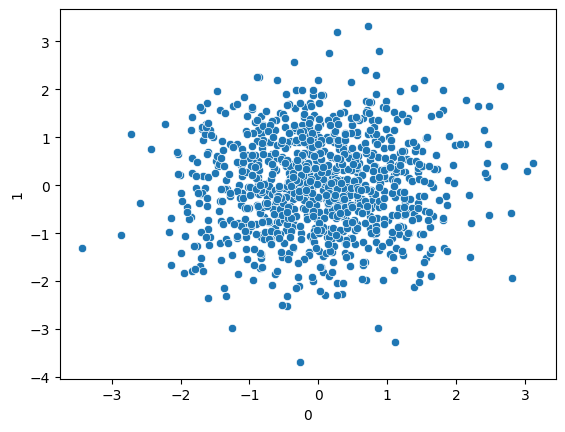

In [8]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [12]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [13]:
y_pred=svr.predict(x_test)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.998638896146483

In [15]:
mean_squared_error(y_test,y_pred)

10.275465065058956

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params={
    'C':[1,2,3,10,50,100,120],
    'gamma':[0.1,1,0.2,0.001,0.003],
    'kernel':['linear'],
    'epsilon':[0.001,0.1,0.2,0.3]
}

In [18]:
grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.001, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.001, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.001, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.001, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.001, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.001, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.001, gamma=1, kernel=linear;, score=0.998 total time=   0.1s
[CV 3/5] END C=1, epsilon=0.001, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.001, gamma=1, kernel=linear;, score=0.998 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.001, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.001, gamm

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 100, 120],
                         'epsilon': [0.001, 0.1, 0.2, 0.3],
                         'gamma': [0.1, 1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
final_model=grid.best_estimator_

In [21]:
y_pred1=final_model.predict(x_test)

In [22]:
r2_score(y_test,y_pred1)

0.998695294681598

In [24]:
mean_squared_error(y_test,y_pred1)

9.84969213392148